In [21]:
from google.colab import files
uploaded = files.upload()

Saving EastWestAirlines - Sheet1.csv to EastWestAirlines - Sheet1.csv


In [3]:
import pandas as pd
file =  pd.read_csv('EastWestAirlines - Sheet1.csv')
file.head()


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_file = scaler.fit_transform(file)

file = pd.DataFrame(scaled_file,columns = file.columns)
file.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
linked = linkage(file, method='ward')
linked

array([[2.67800000e+03, 2.67900000e+03, 2.42270462e-03, 2.00000000e+00],
       [3.72600000e+03, 3.72800000e+03, 4.69027727e-03, 2.00000000e+00],
       [2.21500000e+03, 2.22000000e+03, 6.46302526e-03, 2.00000000e+00],
       ...,
       [7.98000000e+03, 7.99100000e+03, 8.51146270e+01, 1.84300000e+03],
       [7.98300000e+03, 7.99300000e+03, 8.90846505e+01, 2.15600000e+03],
       [7.99400000e+03, 7.99500000e+03, 1.18009987e+02, 3.99900000e+03]])

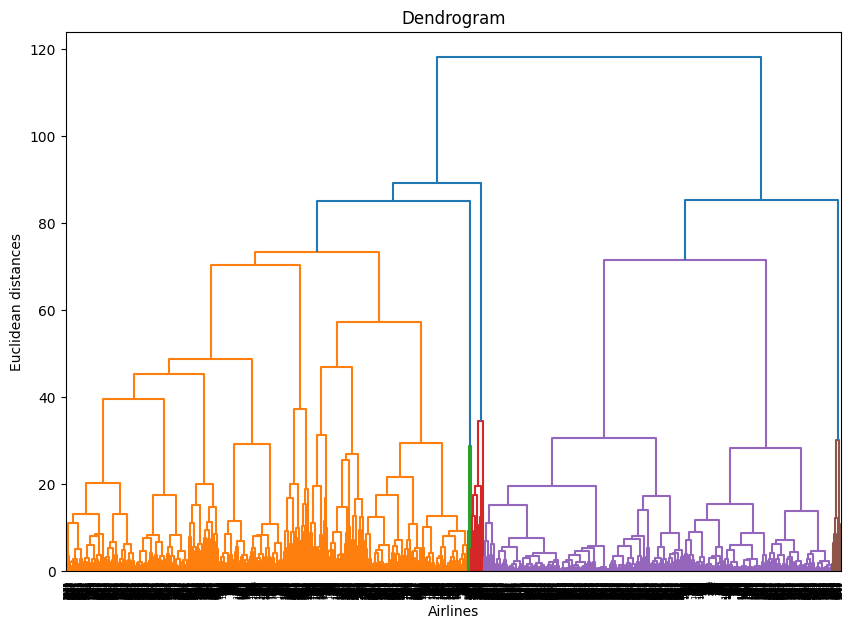

In [38]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Airlines')
plt.ylabel('Euclidean distances')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be

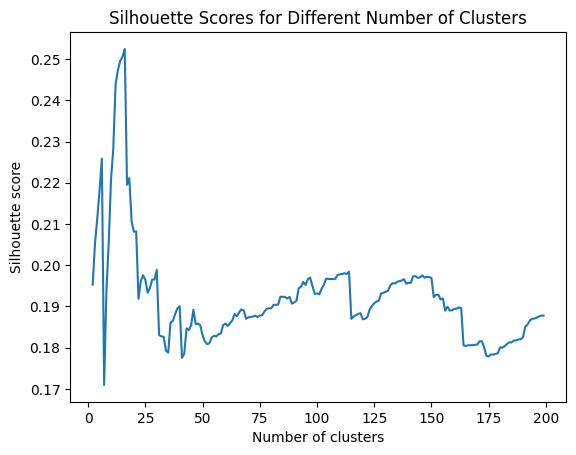

Optimal number of clusters: 16


In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []
cluster_range = range(2, 200)
for n_clusters in cluster_range:
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(file)
    silhouette_scores.append(silhouette_score(file, cluster_labels))

# Plot silhouette scores
plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.show()

# Find optimal number of clusters
optimal_clusters = np.argmax(silhouette_scores) + 2
print(f"Optimal number of clusters: {optimal_clusters}")


In [55]:
#Y for AgglomerativeClustering
Y = AgglomerativeClustering(n_clusters = optimal_clusters, affinity = 'euclidean', linkage = 'ward').fit_predict(file)
Y = pd.DataFrame(Y)
Y.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


,0
0,2
1,2
2,2
3,2
4,4


[47987.999999999985, 39018.847429544236, 34529.1686661134, 30616.623636092663, 26894.753059893228, 23490.74902876985, 21885.368244869336, 19330.6951763037, 18015.300658980435, 16846.161847375988, 15774.923677280569, 14961.202455016066, 14217.40847436898, 13724.239713323048, 13180.28555109131, 12661.009610623987, 12183.550273668392, 11760.697597187715, 11385.396272522688, 11061.48762755574, 10636.656635438052, 10557.028205359362, 10043.973198876181, 9887.318831388407, 9686.228108314108, 9493.739621690356, 9372.357216761426, 9229.822601118613, 9020.269836400897, 8961.010632340247, 8718.894260314413, 8567.814744066967, 8426.76663991439, 8353.107041889172, 8262.09205339341, 8094.307754691321, 8012.772174025379, 7946.978606801282, 7805.971377253428, 7698.976117937825, 7589.362928193212, 7460.3979887095265, 7418.4873547297775, 7309.572333151942, 7248.0819372362475, 7208.4671755811605, 7054.649188694613, 6936.798845639492, 6911.893647460716]


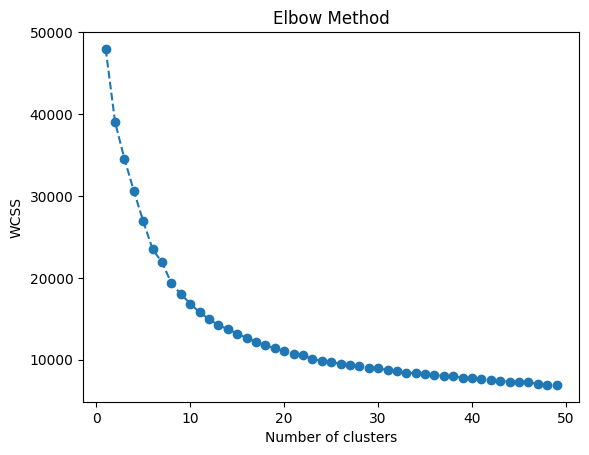

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate WCSS (Within-Cluster-Sum-of-Squares) for different values of k
wcss = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(file)
    wcss.append(kmeans.inertia_)
print(wcss)

# Elbow graph
plt.plot(range(1, 50), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# from the plot I will conisider optimum number of clusters is 8


In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN

# Define the DBSCAN model with eps=0.5 and min_samples=10
dbscan = DBSCAN(eps=0.5, min_samples=10)


y_pred_dbscan = dbscan.fit_predict(scaled_file)

# Calculate the number of clusters
num_clusters = len(np.unique(y_pred_dbscan))


print(f"Number of clusters: {num_clusters}")


Y = pd.DataFrame(y_pred_dbscan)
Y.head()


Number of clusters: 13


,0
0,0
1,0
2,0
3,0
4,-1
